# 1. Įvadas  

#### 1.1. Tikslai

Tyrimo tikslas – išanalizuoti turimus iš Japonijos kilusios animacijos stiliaus – Anime duomenis.

Tyrimo uždaviniai:
1.	Nustatyti, kokių Anime tipų yra daugiausia.
2.	Išanalizuoti Anime tipus pagal reitingus ir reitingavusių narių skaičių.
3.	Išsiaiškinti populiariausius Anime kūrinius.
4.	Išanalizuoti Anime tipų žanrus ir atlikti gilesnę populiariausio žanro analizę.
5.	Atlikti dviejų populiariausių Anime tipų analizę, atsižvelgiant į pasirinktus žanrus.

Hipotezė : atsižvelgiant į animacijos kiekį, reitingą ir balsavusiųjų skaičių, populiariausi yra TV komedijos žanro Anime.

#### 1.2. Duomenų šaltinis

Duomenys buvo panaudoti iš interneto svetainės data.world - https://data.world/annisasugest/animenew

# 2. Duomenų apdorojimas

#### 2.1. Reikalingi moduliai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import data
from matplotlib import rcParams

#### 2.2. Duomenų importavimas

In [2]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df = df.reset_index()
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df.describe( include = "all" ) 

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


#### 2.3. Duomenų filtravimas

In [6]:
df = df[df["rating"]>=6]
df = df[df["members"]>=1000]

df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
11843,2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368
11844,24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403
11847,2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756
11848,827,Uba,Hentai,OVA,2,6.00,2437


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 0 to 11849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  6174 non-null   int64  
 1   name      6174 non-null   object 
 2   genre     6172 non-null   object 
 3   type      6174 non-null   object 
 4   episodes  6174 non-null   object 
 5   rating    6174 non-null   float64
 6   members   6174 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 385.9+ KB


In [8]:
df[df['genre'].isna()].head()

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345


In [9]:
df = df.dropna(how='any')
final_data = df.drop_duplicates()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 11849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  6172 non-null   int64  
 1   name      6172 non-null   object 
 2   genre     6172 non-null   object 
 3   type      6172 non-null   object 
 4   episodes  6172 non-null   object 
 5   rating    6172 non-null   float64
 6   members   6172 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 385.8+ KB


# 3. Duomenų analizė

#### 3.1. Apskaičiuojame kiekvienos Anime rūšies kiekį

In [10]:
final_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


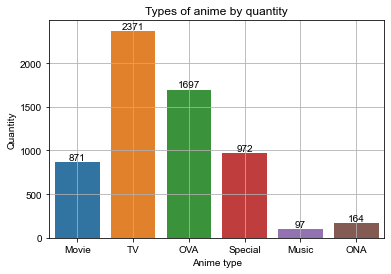

In [11]:
ax = sns.countplot(data=final_data, x ='type')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
ax.set(xlabel='Anime type', ylabel='Quantity')
plt.grid(True)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

Pagal diagramą matome, kad didžiausias pasirinkimas yra TV ir OVA (angl. Original video animation) Anime.

#### 3.2. Apskaičiuojame reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal Anime tipus

In [12]:
final_data.groupby('type')[['rating','members']].mean().round(2)


,rating,members
type,,
Movie,7.35,26921.32
Music,6.82,5397.31
ONA,6.81,14913.10
OVA,6.87,10813.47
Special,7.01,12800.73
TV,7.28,66972.03


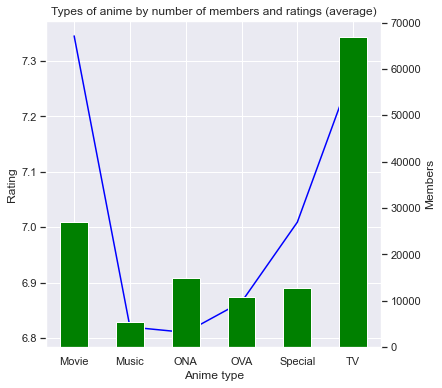

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data.groupby('type').mean()['rating'].plot(ax=ax, color = 'blue')
ax2=ax.twinx()
p2 = final_data.groupby('type').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Anime type')
ax.set_title('Types of anime by number of members and ratings (average)')
plt.grid(False)
plt.show()

Nustatyta, kad pagal reitingų vidurkį ir vidutinį balsavusių narių skaičių populiariausi yra Movie ir TV Anime.

#### 3.3. Nustatome reitingų vidurkio ir vidutinio balsavusių narių skaičiaus pasiskirstymą

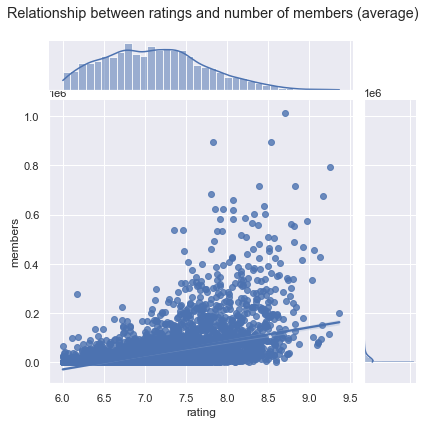

In [14]:
ax = sns.jointplot(data=final_data, x="rating", y="members", kind = "reg" )
ax.fig.suptitle("Relationship between ratings and number of members (average)")
ax.fig.subplots_adjust(top=0.9)
plt.grid(True)
plt.show()

Galima daryti išvadą, kad dažniausiai žiūrimi Anime, kurių reitingas 6.7-7.2 ir balsavusių narių skaičius tarp 10 0000 ir 15 000.

#### 3.4. Surandame Anime kūrinius pagal didžiausią reitingą ir narių skaičių

In [15]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534


3.4.2. Išfiltruojame dešimt didžiausią narių kiekį turinčių Anime neatsižvelgiant į Anime tipą

In [16]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


3.4.3. Patikriname, ar yra sutampančių Anime pagal didžiausią reitingą ir narių skaičių.

In [17]:
top_10_combined = top_10_rating.assign(result=top_10_rating['anime_id'].isin(top_10_members['anime_id']))
top_10_combined[top_10_combined['result'] == True]

,anime_id,name,genre,type,episodes,rating,members,result
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


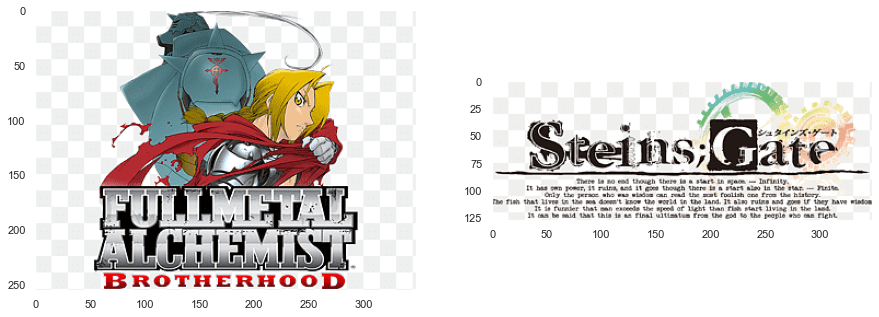

In [18]:
myImage_1 = Image.open("Brotherhood.png")
myImage_2 = Image.open("png.png")

rcParams['figure.figsize'] = 15 ,10
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(1,2)
ax[0].imshow(myImage_1)
ax[1].imshow(myImage_2)
plt.show()

#### 3.5. Analizė pagal Anime žanrus

3.5.1. Patikriname, kiek yra Anime žanrų

In [19]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
genre_count=pd.DataFrame(genre_count)
genre_count = genre_count.reset_index()
genre_count

,index,genre
0,Hentai,507
1,Comedy,136
2,Music,69
3,"Comedy, Slice of Life",58
4,"Comedy, School, Slice of Life",55
5,"Adventure, Comedy, Mystery, Police, Shounen",32
6,"Action, Mecha, Sci-Fi",31
7,"Action, Adventure, Comedy, Shounen",30
8,"Comedy, Parody",29
9,"Adventure, Mecha, Sci-Fi, Shounen",26


Analizė pagal gautas kategorijas neįmanoma, kadangi kartojasi tos pačios žanrų rūšys. Todėl sukuriamos naujos žanrų kategorijos.

3.5.2. Sukuriamos naujos žanrų kategorijos.

In [20]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy "
    if "Fantasy" in str:
        result_text += "Fantasy "
    if "Adventure" in str:
        result_text += "Adventure "
    return (result_text)
   
final_data["filtered_genre"]= final_data["genre"].map(genre_identification)
final_data.head()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [21]:
final_data["filtered_genre"].astype(str)
final_data["filtered_genre"] = final_data["filtered_genre"].replace('',"Not suitable")
final_data.head()  


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Not suitable
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Not suitable
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [22]:
final_data['filtered_genre'].value_counts()

Not suitable                 2357
Comedy                       1794
Adventure                     430
Fantasy                       422
Comedy Fantasy Adventure      308
Comedy Adventure              307
Fantasy Adventure             297
Comedy Fantasy                257
Name: filtered_genre, dtype: int64

In [23]:
fd_genre = final_data[final_data ['filtered_genre'] != "Not suitable"]
fd_genre.head()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


3.5.3. Apskaičiuojame kiekvieno Anime žanro kiekius

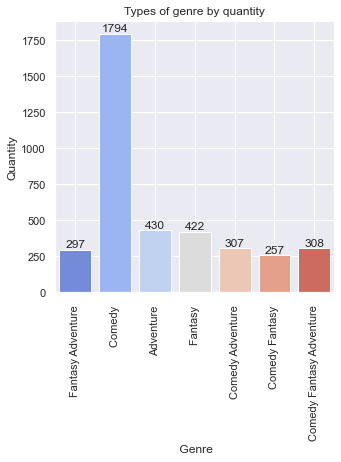

In [28]:
ax = sns.countplot(data=fd_genre, x ='filtered_genre', palette="coolwarm")
ax.bar_label(ax.containers[0])
ax.set_title('Types of genre by quantity')
ax.set(xlabel=' Genre', ylabel='Quantity')
plt.xticks(rotation=90)
plt.grid(True)
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

Iš diagramos matyti, kad populiariausias Anime žanras yra Comedy.

3.5.4. Apskaičiuojame reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal sukurtus Anime žanrus

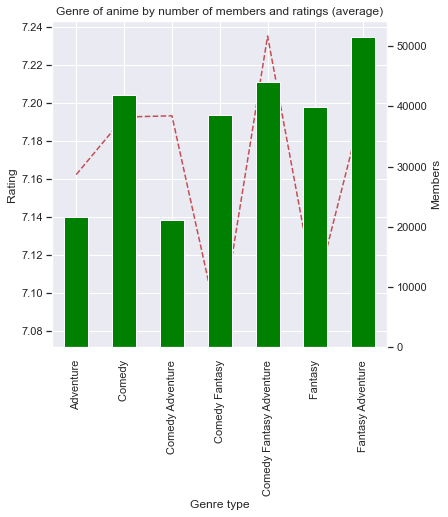

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = fd_genre.groupby('filtered_genre').mean()['rating'].plot(ax=ax, c="r", ls = '--')
ax2=ax.twinx()
p2 = fd_genre.groupby('filtered_genre').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Genre type')
ax.set_title('Genre of anime by number of members and ratings (average)')
ax.tick_params(axis='x', rotation=90)
plt.grid(False)
plt.show()


Nustatyta, kad pagal reitingų vidurkį populiariausi yra Comedy-Fantasy-Adventure ir Comedy-Adventure Anime žanrai. 
Tuo tarpu pagal balsavusių narių skaičių aukščiausioje vietoje yra Fantasy-Adventure ir Comedy-Fantasy-Adventure Anime žanrai.

3.5.5. Nustatome priklausomybę tarp reitingų dydžio ir narių balsavimo kiekio pagal Anime žanrus

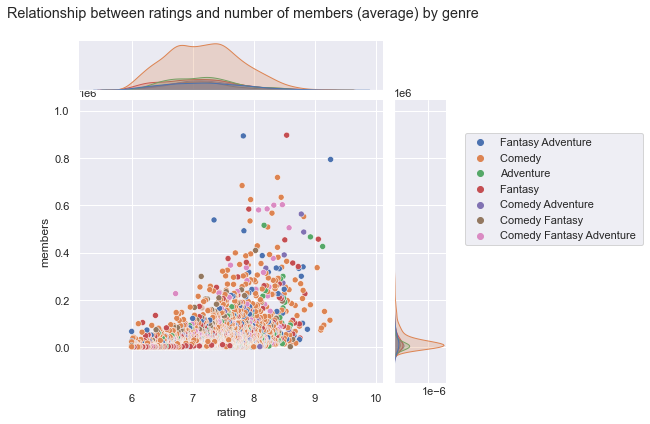

In [30]:
ax = sns.jointplot(data=fd_genre, x="rating", y="members",hue = "filtered_genre" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)
ax.fig.suptitle("Relationship between ratings and number of members (average) by genre")
ax.fig.subplots_adjust(top=0.9)
plt.grid(True)
plt.show()

Pagal duomenis galima nustatyti, kad didėjnat reitingams, didėja ir reitingavusių narių skaičius. 
Dažniausiai suteikiamas reitingas buvo tarp 6,8 ir 7,5, o aktyviausios grupės - kai balsuotojų skaičius iki 15 000.

#### 3.6. Didžiausio žanro Comedy analizė 

3.6.1. Apskaičiuojame Comedy žanro reitingų vidurkius ir vidutinį balsavusių narių skaičių pagal Anime tipus

In [33]:
comedy_genre = fd_genre[fd_genre["filtered_genre"] == "Comedy "]
comedy_genre.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,Comedy
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,Comedy


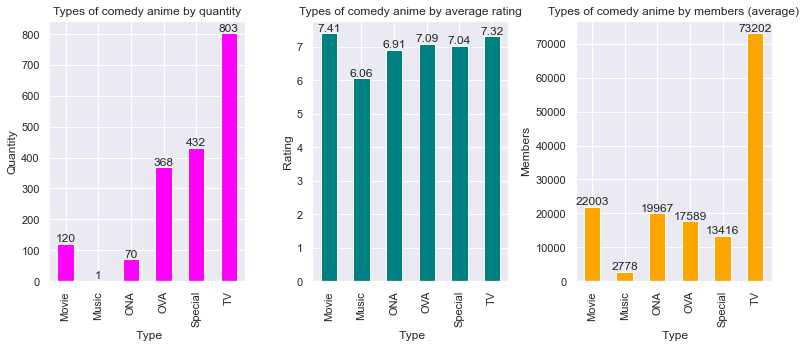

In [32]:
plt.subplot(1,3,1)

ax1 = comedy_genre.groupby('type').count()['anime_id'].plot (kind = "bar", color = 'magenta', figsize =(11,5))
ax1.bar_label(ax1.containers[0])
ax1.set_title('Types of comedy anime by quantity')
ax1.set(xlabel=' Type', ylabel='Quantity')

plt.subplot(1,3,2)
ax2 = comedy_genre.groupby('type').mean()['rating'].round(2).plot (kind = "bar", color = 'teal',figsize =(11,5) )
ax2.bar_label(ax2.containers[0])
ax2.set_title('Types of comedy anime by average rating')
ax2.set(xlabel=' Type', ylabel='Rating')

plt.subplot(1,3,3)
ax3 = comedy_genre.groupby('type').mean()['members'].round(0).plot (kind = "bar", color = 'orange', figsize =(11,5))
ax3.bar_label(ax3.containers[0])
ax3.set_title('Types of comedy anime by members (average)')
ax3.set(xlabel=' Type', ylabel='Members')

plt.tight_layout()


Comedy žanro Anime daugiausiai yra TV tipo. Taip pat ir daugiausiai narių balsuoja už TV tipo Anime, tačiau vidutiniškai aukščiausius reitingus gauna Movie tipo Anime.

3.6.2. Comedy žanro populiariauso Anime kūrinio nustatymas 

Išfiltruojame po tris Anime, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [47]:
comedy_genre['rating'].sort_values(ascending=False).head(3)

2    9.25
4    9.16
5    9.15
Name: rating, dtype: float64

In [41]:
comedy_genre['members'].sort_values(ascending=False).head(3)

159    717796
841    683297
131    633817
Name: members, dtype: int64

Nustatome Anime pavadinimus, kurių reitingas ir balsavusių narių skaičius didžiausi.

In [46]:
comedy_genre.loc[[2,159]]


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,Comedy


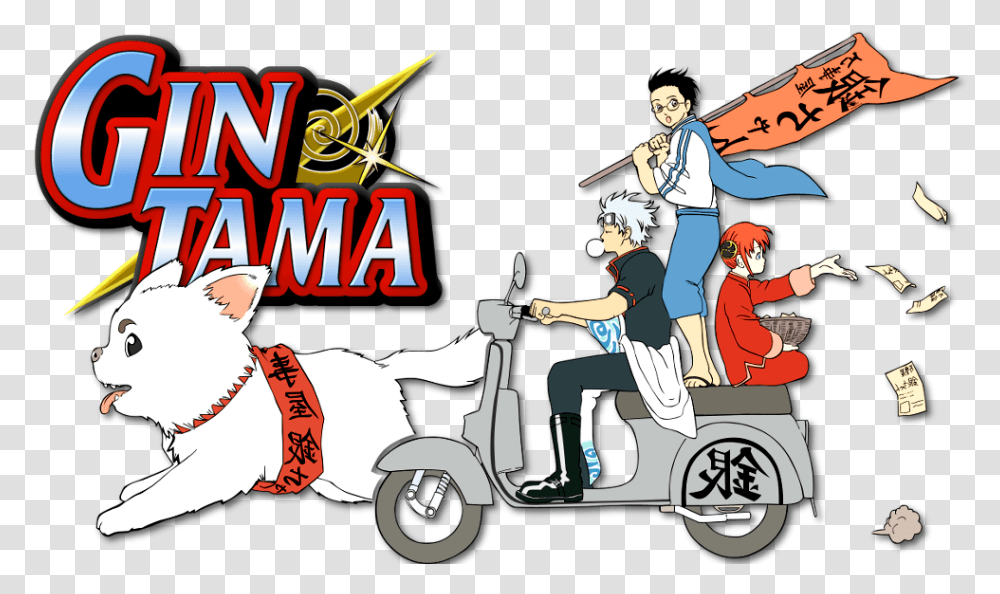

In [39]:
myImage_3 = Image.open("gintama.png")
myImage_3

Anime tipų - TV ir OVA - analizė pagal pasirinktus žanrus

TV tipo anime rodiklių apskaičiavimas

In [174]:
TV_data = fd_genre[fd_genre['type'] == "TV"]
TV_data.head()

,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
4,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure


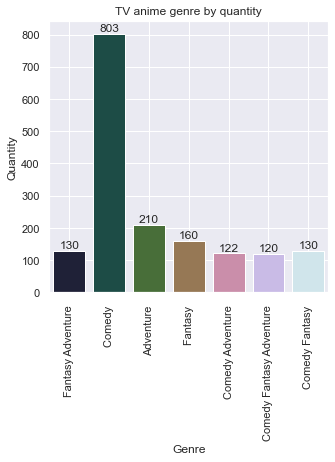

In [175]:
ax = sns.countplot(data=TV_data, x ='filtered_genre', palette="cubehelix")
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)
ax.set_title('TV anime genre by quantity')
ax.set(xlabel='Genre', ylabel='Quantity')
sns.set(rc={'figure.figsize':(5,5)})
plt.grid(True)
plt.show()

Analizė pagal epizodų skaičių

In [176]:
TV_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 3733
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        1675 non-null   int64  
 1   name            1675 non-null   object 
 2   genre           1675 non-null   object 
 3   type            1675 non-null   object 
 4   episodes        1675 non-null   object 
 5   rating          1675 non-null   float64
 6   members         1675 non-null   int64  
 7   filtered_genre  1675 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 117.8+ KB


In [177]:
TV_data[TV_data["episodes"] == "Unknown"].count()


anime_id          20
name              20
genre             20
type              20
episodes          20
rating            20
members           20
filtered_genre    20
dtype: int64

In [189]:
TV_data_clean = TV_data.set_index("episodes")
TV_data_clean.head()


,anime_id,name,genre,type,rating,members,filtered_genre
episodes,,,,,,,
64,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,Fantasy Adventure
51,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,Comedy
51,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,Comedy
10,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,93351,Comedy
148,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13,425855,Adventure


In [190]:
# data_with_index = data_with_index.drop("Ireland")

TV_data_clean = TV_data_clean.drop("Unknown")
TV_data_clean = TV_data_clean.reset_index()
TV_data_clean["episodes"].astype(int)
TV_data_clean.head()

,episodes,anime_id,name,genre,type,rating,members,filtered_genre
0,64,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665,Fantasy Adventure
1,51,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262,Comedy
2,51,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266,Comedy
3,10,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,93351,Comedy
4,148,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13,425855,Adventure


In [191]:
TV_data_clean.nlargest(n=10, columns=['episodes'], keep = "all")

TypeError: Column 'episodes' has dtype object, cannot use method 'nlargest' with this dtype

In [218]:

df[df ['anime_id'] == 2 ]

KeyError: 'anime_id'